In [1]:
#config.ipynb contains all the import
%run ../global_class/config.ipynb
#it's a the multipolygone of Shanghai
%run ../global_class/getShanghai.ipynb

In [2]:
df_poi = pd.read_pickle('../pickles/utseus-poi-dianping.pk')

In [3]:
type(df_poi)

geopandas.geodataframe.GeoDataFrame

In [4]:
df_poi.head()

,name,branch_name,address,telephone,city,avg_rating,product_grade,decoration_grade,service_grade,product_score,decoration_score,service_score,review_count,avg_price,photo_count,category,latitude,longitude,geometry
business_id,,,,,,,,,,,,,,,,,,,
500000,阿凡提美食娱乐城(这是一条测试商户数据，仅用于测试开发，开发完成后请申请正式数据...),,虹口区曲阳路775号天山宾馆B1楼,021-65559604,上海,30.0,1.0,1.0,1.0,6.8,6.3,6.3,482,81.0,140.0,新疆菜,31.290270,121.485969,POINT (121.4859694378507 31.29027007137677)
500001,萨莎(这是一条测试商户数据，仅用于测试开发，开发完成后请申请正式数据...),,徐汇区东平路11号,021-64746628,上海,40.0,1.0,1.0,1.0,7.3,8.4,7.4,891,149.0,441.0,酒吧,31.210445,121.445120,POINT (121.4451198540866 31.21044487104275)
500001,萨莎(这是一条测试商户数据，仅用于测试开发，开发完成后请申请正式数据...),,徐汇区东平路11号,021-64746628,上海,40.0,1.0,1.0,1.0,7.3,8.4,7.4,891,149.0,441.0,牛排,31.210445,121.445120,POINT (121.4451198540866 31.21044487104275)
500003,1221餐馆(这是一条测试商户数据，仅用于测试开发，开发完成后请申请正式数据...),,长宁区延安西路1221号,021-62136585,上海,35.0,1.0,1.0,1.0,7.1,7.4,7.6,369,144.0,182.0,本帮菜,31.213174,121.423148,POINT (121.4231477606538 31.21317357030482)
500008,Food Live(这是一条测试商户数据，仅用于测试开发，开发完成后请申请正式数据...),,浦东新区世纪大道88号金茂君悦大酒店B1楼,021-50491234-8283,上海,30.0,1.0,1.0,1.0,6.1,6.3,6.3,38,26.0,12.0,快餐简餐,31.237286,121.501334,POINT (121.501334104979 31.23728587667836)


In [5]:
#df_poi has value na
print(len(df_poi))
print(len(df_poi.dropna()))

365916
365454


In [6]:
df_poi = df_poi[df_poi.longitude.notna()]

In [7]:
print(sum(df_poi.longitude.isna()))
print(sum(df_poi.latitude.isna()))

0
0


In [8]:
print(type(df_poi.avg_rating.iloc[0]))
print(type(df_poi.longitude.iloc[0]))
print(type(df_poi.latitude.iloc[0]))

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


In [9]:
gdf_poi = gpd.GeoDataFrame(df_poi, geometry = [Point(x,y) for x,y in zip(df_poi.longitude, df_poi.latitude)])
gdf_poi.crs = {'init': 'epsg:4326'} #world degree

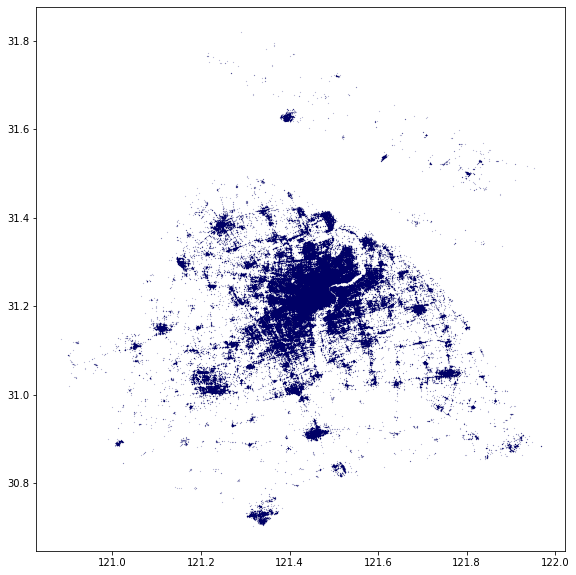

In [10]:
gdf_poi.plot(markersize=0.01, c='#000066', figsize=(15,10))

In [11]:
time = ManagingTime()
time.displayStartTime()

gdf_poi = gdf_poi.loc[gdf_poi.within(shanghai)]

time.displayRunningTime()

Starting time: 2020-01-05 23:46:10.502316
Running time: 0:03:44.398629


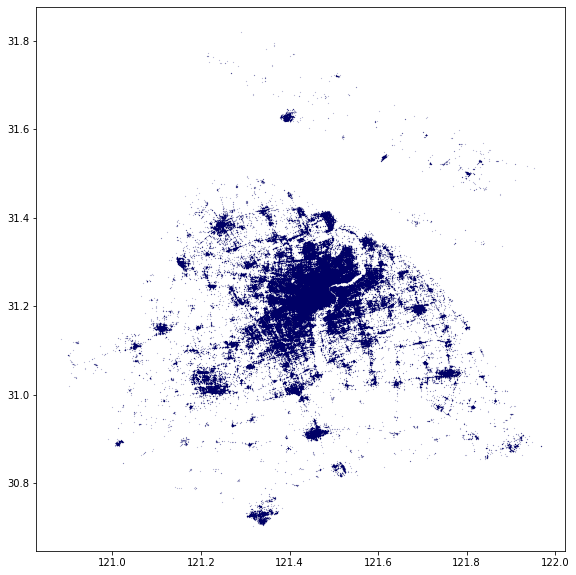

In [12]:
gdf_poi.plot(markersize=0.01, c='#000066', figsize=(15,10))

In [13]:
print(len(gdf_poi))
# We removed ? points outside of Shanghai

365916


In [14]:
gdf_poi.head()

,name,branch_name,address,telephone,city,avg_rating,product_grade,decoration_grade,service_grade,product_score,decoration_score,service_score,review_count,avg_price,photo_count,category,latitude,longitude,geometry
business_id,,,,,,,,,,,,,,,,,,,
500000,阿凡提美食娱乐城(这是一条测试商户数据，仅用于测试开发，开发完成后请申请正式数据...),,虹口区曲阳路775号天山宾馆B1楼,021-65559604,上海,30.0,1.0,1.0,1.0,6.8,6.3,6.3,482,81.0,140.0,新疆菜,31.290270,121.485969,POINT (121.4859694378507 31.29027007137677)
500001,萨莎(这是一条测试商户数据，仅用于测试开发，开发完成后请申请正式数据...),,徐汇区东平路11号,021-64746628,上海,40.0,1.0,1.0,1.0,7.3,8.4,7.4,891,149.0,441.0,酒吧,31.210445,121.445120,POINT (121.4451198540866 31.21044487104275)
500001,萨莎(这是一条测试商户数据，仅用于测试开发，开发完成后请申请正式数据...),,徐汇区东平路11号,021-64746628,上海,40.0,1.0,1.0,1.0,7.3,8.4,7.4,891,149.0,441.0,牛排,31.210445,121.445120,POINT (121.4451198540866 31.21044487104275)
500003,1221餐馆(这是一条测试商户数据，仅用于测试开发，开发完成后请申请正式数据...),,长宁区延安西路1221号,021-62136585,上海,35.0,1.0,1.0,1.0,7.1,7.4,7.6,369,144.0,182.0,本帮菜,31.213174,121.423148,POINT (121.4231477606538 31.21317357030482)
500008,Food Live(这是一条测试商户数据，仅用于测试开发，开发完成后请申请正式数据...),,浦东新区世纪大道88号金茂君悦大酒店B1楼,021-50491234-8283,上海,30.0,1.0,1.0,1.0,6.1,6.3,6.3,38,26.0,12.0,快餐简餐,31.237286,121.501334,POINT (121.501334104979 31.23728587667836)


We quickly observe that some rows have duplicated business_id. It seems to be because a place can have different categories. 

Therefore I decided to create criteria by the most representative categories and some by removing the categories and the duplicated rows

In [15]:
gdf_poi.columns

Index(['name', 'branch_name', 'address', 'telephone', 'city', 'avg_rating',
       'product_grade', 'decoration_grade', 'service_grade', 'product_score',
       'decoration_score', 'service_score', 'review_count', 'avg_price',
       'photo_count', 'category', 'latitude', 'longitude', 'geometry'],
      dtype='object')

In [16]:
gdf_poi['category_en'] = ""
gdf_poi['category_en'][gdf_poi.category == '服饰鞋包'] = "Clothing shoes and bags"
gdf_poi['category_en'][gdf_poi.category == '超市/便利店'] = "Supermarket and Convenience Store"
gdf_poi['category_en'][gdf_poi.category == '食品茶酒'] = "Food, Tea and Wine"
gdf_poi['category_en'][gdf_poi.category == '快餐简餐'] = "Fast food"
gdf_poi['category_en'][gdf_poi.category == '小区'] = "neighborhood"
gdf_poi['category_en'][gdf_poi.category == '美发'] = "Hairdressing"
gdf_poi['category_en'][gdf_poi.category == '美容/SPA'] = "Beauty and SPA"
gdf_poi['category_en'][gdf_poi.category == '培训'] = "Training"
gdf_poi['category_en'][gdf_poi.category == '小吃'] = "snack"
gdf_poi['category_en'][gdf_poi.category == '银行'] = "bank"

C:\Users\Roger\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Roger\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Roger\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the 

In [17]:
gdf_poi_cat = gdf_poi[gdf_poi.category_en != ""]

In [18]:
gdf_poi = gdf_poi.drop(columns=['category','category_en'])

In [19]:
print(len(gdf_poi))
print(len(gdf_poi.drop_duplicates(keep = 'first', subset=gdf_poi.columns.difference(['geometry']))))

365916
347458


In [20]:
gdf_poi = gdf_poi.drop_duplicates(keep = 'first', subset=gdf_poi.columns.difference(['geometry']))
gdf_poi_cat = gdf_poi_cat.drop_duplicates(keep = 'first', subset=gdf_poi.columns.difference(['geometry']))

In [21]:
gdf_poi_cat.category_en.value_counts()

Clothing shoes and bags              28700
Supermarket and Convenience Store    18416
Food, Tea and Wine                   16925
Fast food                            11491
neighborhood                          8862
Beauty and SPA                        8018
Hairdressing                          7736
snack                                 7396
Training                              7330
bank                                  7249
Name: category_en, dtype: int64

In [22]:
from pyproj import Transformer

transformer = Transformer.from_crs("EPSG:4326", "EPSG:4479", always_xy=True)


def getNewLongitude(xy):
    return transformer.transform(xy[0], xy[1])[0]

def getNewLatitude(xy):
    return transformer.transform(xy[0], xy[1])[1]


gdf_poi['longitude_m'] = gdf_poi[['longitude', 'latitude']].copy().apply(getNewLongitude, axis=1)
gdf_poi['latitude_m'] = gdf_poi[['longitude', 'latitude']].copy().apply(getNewLatitude, axis=1)

gdf_poi_cat['longitude_m'] = gdf_poi_cat[['longitude', 'latitude']].copy().apply(getNewLongitude, axis=1)
gdf_poi_cat['latitude_m'] = gdf_poi_cat[['longitude', 'latitude']].copy().apply(getNewLatitude, axis=1)

In [23]:
gdf_poi = gdf_poi[['avg_rating','avg_price','product_score','decoration_score','service_score','review_count','photo_count','longitude','latitude','longitude_m','latitude_m']]
gdf_poi_cat = gdf_poi_cat[['avg_rating','avg_price','product_score','decoration_score','service_score','review_count','photo_count','category','category_en','longitude','latitude','longitude_m','latitude_m']]

In [24]:
gdf_poi = gpd.GeoDataFrame(gdf_poi, geometry = [Point(x,y) for x,y in zip(gdf_poi.longitude_m, gdf_poi.latitude_m)])
gdf_poi.crs = {'init': 'epsg:4479'} #china metric projection
gdf_poi_cat = gpd.GeoDataFrame(gdf_poi_cat, geometry = [Point(x,y) for x,y in zip(gdf_poi_cat.longitude_m, gdf_poi_cat.latitude_m)])
gdf_poi_cat.crs = {'init': 'epsg:4479'} #china metric projection

In [25]:
gdf_poi.to_pickle('../clean_pickles/dianping_poi.pk')
gdf_poi_cat.to_pickle('../clean_pickles/dianping_poi_cat.pk')

In [26]:
gdf_poi = pd.read_pickle('../clean_pickles/dianping_poi.pk')
gdf_poi_cat = pd.read_pickle('../clean_pickles/dianping_poi_cat.pk')

In [27]:
gdf_target = pd.read_pickle('../clean_pickles/target.pk')

In [28]:
type(gdf_target)

geopandas.geodataframe.GeoDataFrame

In [29]:
gdf_target.crs

{'init': 'epsg:4479'}

In [30]:
#gdf_target = gpd.GeoDataFrame(df_target, geometry = 'geometry')
#gdf_target.crs = {'init': 'epsg:4479'} #china metric projection

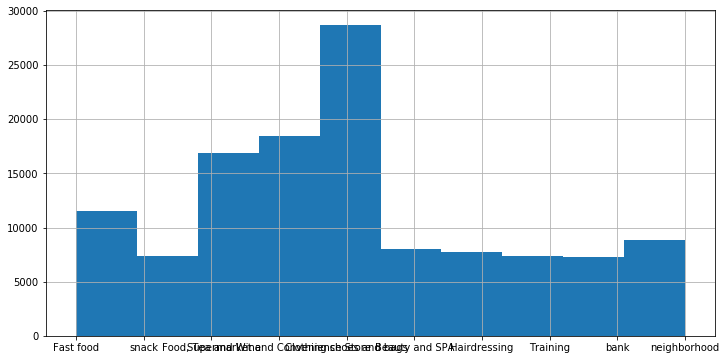

In [31]:
gdf_poi_cat.category_en.hist(figsize=(12,6))

In [32]:
# Get the name of the categorie and their occurence
nameCat = gdf_poi_cat.category_en.value_counts()
nameCat

Clothing shoes and bags              28700
Supermarket and Convenience Store    18416
Food, Tea and Wine                   16925
Fast food                            11491
neighborhood                          8862
Beauty and SPA                        8018
Hairdressing                          7736
snack                                 7396
Training                              7330
bank                                  7249
Name: category_en, dtype: int64

In [33]:
#need ? to run
time = ManagingTime()
time.displayStartTime()

area_buffer = gdf_target['surface_buffer'].iloc[0].area
nameCat = gdf_poi_cat.category_en.value_counts()
for indexCat, valueCat in nameCat.items():
    clear_output()
    time.displayStartTime()
    print(indexCat)
    nameColumns = 'nb_' + indexCat.replace(' ', '_').lower() + '_dianping'
    gdf_poi_onecat = gdf_poi_cat[gdf_poi_cat.category_en == indexCat].copy()    
    gdf_target[nameColumns] = np.nan
    
    for index,value in gdf_target.iterrows():
        gdf_target[nameColumns].loc[index] = len(gdf_poi_onecat.loc[gdf_poi_onecat.within(value.surface_buffer)]) / area_buffer

    gdf_target.to_pickle('../clean_pickles/target_dianping_poi_cat.pk')

time.displayRunningTime()

Starting time: 2020-01-05 23:54:54.154677
bank
Running time: 0:18:07.334837


In [34]:
gdf_target.head()

,clean,smell,noise,longitude,latitude,geometry,longitude_m,latitude_m,surface_buffer,nb_clothing_shoes_and_bags_dianping,nb_supermarket_and_convenience_store_dianping,"nb_food,_tea_and_wine_dianping",nb_fast_food_dianping,nb_neighborhood_dianping,nb_beauty_and_spa_dianping,nb_hairdressing_dianping,nb_snack_dianping,nb_training_dianping,nb_bank_dianping
0,3,0.0,0.0,121.104287,31.155882,POINT (-2822207.586532274 4677635.626522204),-2.822208e+06,4.677636e+06,POLYGON ((-2821707.586532274 4677635.626522204...,0.000037,0.000028,0.000026,0.000013,0.000003,0.000009,0.000017,0.000014,0.000001,0.000009
1,3,1.0,0.0,121.351529,31.144327,POINT (-2842710.938446562 4665979.72602233),-2.842711e+06,4.665980e+06,"POLYGON ((-2842210.938446562 4665979.72602233,...",0.000008,0.000037,0.000054,0.000015,0.000022,0.000013,0.000009,0.000019,0.000011,0.000004
2,2,0.0,0.0,121.468520,31.042285,POINT (-2855282.42475198 4665148.863744967),-2.855282e+06,4.665149e+06,"POLYGON ((-2854782.42475198 4665148.863744967,...",0.000004,0.000024,0.000018,0.000008,0.000010,0.000005,0.000009,0.000003,0.000000,0.000004
3,3,0.0,0.0,121.367237,31.240725,POINT (-2841108.748930959 4660473.749148724),-2.841109e+06,4.660474e+06,POLYGON ((-2840608.748930959 4660473.749148724...,0.000014,0.000027,0.000029,0.000006,0.000022,0.000020,0.000015,0.000005,0.000009,0.000015
4,2,NaN,0.0,121.403601,31.269155,POINT (-2843213.856075277 4657273.732656028),-2.843214e+06,4.657274e+06,POLYGON ((-2842713.856075277 4657273.732656028...,0.000108,0.000019,0.000059,0.000018,0.000022,0.000028,0.000019,0.000009,0.000020,0.000017


In [35]:
gdf_poi.columns

Index(['avg_rating', 'avg_price', 'product_score', 'decoration_score',
       'service_score', 'review_count', 'photo_count', 'longitude', 'latitude',
       'longitude_m', 'latitude_m', 'geometry'],
      dtype='object')

In [36]:
gdf_poi.describe()

,avg_rating,avg_price,product_score,decoration_score,service_score,review_count,photo_count,longitude,latitude,longitude_m,latitude_m
count,347458.000000,347458.000000,347458.000000,347458.000000,347458.000000,347458.000000,347458.000000,347458.000000,347458.000000,3.474580e+05,3.474580e+05
mean,13.193551,140.783882,1.905123,1.924428,1.923301,31.851709,28.965956,121.445299,31.207987,-2.848426e+06,4.658187e+06
std,16.392759,3159.782369,3.154232,3.183711,3.182305,271.425080,214.653572,0.111979,0.108246,9.302628e+03,8.121473e+03
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,120.882711,30.703728,-2.900624e+06,4.617858e+06
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,121.394044,31.167208,-2.852428e+06,4.653259e+06
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,121.447631,31.223326,-2.848281e+06,4.656955e+06
75%,30.000000,0.000000,6.400000,6.500000,6.500000,4.000000,6.000000,121.500008,31.265774,-2.844361e+06,4.661401e+06
max,50.000000,504020.000000,9.500000,9.500000,9.500000,32767.000000,32767.000000,121.968187,31.819730,-2.804953e+06,4.696763e+06


In [37]:
gdf_target = pd.read_pickle('../clean_pickles/target.pk')

In [38]:
#need 22:46 to run
time = ManagingTime()
time.displayStartTime()

area_buffer = gdf_target['surface_buffer'].iloc[0].area
gdf_target['nb_poi_dianping'] = np.nan
gdf_target['av_rating_dianping'] = np.nan
gdf_target['av_price_dianping'] = np.nan
gdf_target['av_photo_count_dianping'] = np.nan
gdf_target['av_decoration_score_dianping'] = np.nan
gdf_target['av_product_score_dianping'] = np.nan
gdf_target['av_service_score_dianping'] = np.nan
gdf_target['av_review_count_dianping'] = np.nan
for index,value in gdf_target.iterrows():
    clear_output()
    time.displayStartTime()
    print(index)
    gdf_poi_temp = gdf_poi.loc[gdf_poi.within(value.surface_buffer)]
    gdf_target['nb_poi_dianping'].loc[index] = len(gdf_poi_temp) / area_buffer
    gdf_target['av_rating_dianping'].loc[index] = gdf_poi_temp['avg_rating'][gdf_poi_temp['avg_rating'] != 0].mean()
    gdf_target['av_price_dianping'].loc[index] = gdf_poi_temp['avg_price'][gdf_poi_temp['avg_price'] != 0].mean()
    gdf_target['av_photo_count_dianping'].loc[index] = gdf_poi_temp['photo_count'][gdf_poi_temp['photo_count'] != 0].mean()
    gdf_target['av_decoration_score_dianping'].loc[index] = gdf_poi_temp['decoration_score'][gdf_poi_temp['decoration_score'] != 0].mean()
    gdf_target['av_product_score_dianping'].loc[index] = gdf_poi_temp['product_score'][gdf_poi_temp['product_score'] != 0].mean()
    gdf_target['av_service_score_dianping'].loc[index] = gdf_poi_temp['service_score'][gdf_poi_temp['service_score'] != 0].mean()
    gdf_target['av_review_count_dianping'].loc[index] = gdf_poi_temp['review_count'][gdf_poi_temp['review_count'] != 0].mean()

gdf_target.to_pickle('../clean_pickles/target_dianping_poi.pk')

time.displayEndTime()
time.displayRunningTime()

Starting time: 2020-01-06 00:13:02.778989
466
Ending time: 2020-01-06 01:02:07.286095
Running time: 0:49:04.507106


In [39]:
gdf_target.head()

,clean,smell,noise,longitude,latitude,geometry,longitude_m,latitude_m,surface_buffer,nb_poi_dianping,av_rating_dianping,av_price_dianping,av_photo_count_dianping,av_decoration_score_dianping,av_product_score_dianping,av_service_score_dianping,av_review_count_dianping
0,3,0.0,0.0,121.104287,31.155882,POINT (-2822207.586532274 4677635.626522204),-2.822208e+06,4.677636e+06,POLYGON ((-2821707.586532274 4677635.626522204...,0.000474,32.643312,82.097561,10.268041,7.100781,6.937500,7.057812,13.962567
1,3,1.0,0.0,121.351529,31.144327,POINT (-2842710.938446562 4665979.72602233),-2.842711e+06,4.665980e+06,"POLYGON ((-2842210.938446562 4665979.72602233,...",0.000550,32.103175,98.093023,12.203947,7.052500,6.903750,7.005000,16.616883
2,2,0.0,0.0,121.468520,31.042285,POINT (-2855282.42475198 4665148.863744967),-2.855282e+06,4.665149e+06,"POLYGON ((-2854782.42475198 4665148.863744967,...",0.000214,32.083333,102.571429,6.105263,6.924000,6.856000,6.924000,5.187500
3,3,0.0,0.0,121.367237,31.240725,POINT (-2841108.748930959 4660473.749148724),-2.841109e+06,4.660474e+06,POLYGON ((-2840608.748930959 4660473.749148724...,0.000446,32.681818,8679.658537,19.344444,7.129508,7.039344,7.096721,31.567568
4,2,NaN,0.0,121.403601,31.269155,POINT (-2843213.856075277 4657273.732656028),-2.843214e+06,4.657274e+06,POLYGON ((-2842713.856075277 4657273.732656028...,0.000792,33.696275,316.924138,37.509506,7.242742,7.155242,7.237500,67.919799
